# Hypothesis Testing

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

### Матрица ошибок

|      | $X \in \mathscr{X}_0$ | $X \in \mathscr{X}_1$   |
|------|-----------------------|-------------------------|
|$H_0$ |   Right decision      |   Type II Error         |
|$H_1$ |   Type I  Error       |  Right decision         |

$
\alpha = \mathbb{P}("01P") = P(X \in \mathscr{X}_1 | H_0)
$

$
\beta = \mathbb{P}("02P") = P(X \in \mathscr{X}_0 | H_1)
$

$
\text{Мощность критерия} = 1 - \beta
$

 ### P-value

Пусть $T(X)$ — тестовая статистика.

a) Двусторонняя гипотеза:

$\text{P-value} = 2\mathbb{P}(X < -T(X)) =  2\mathbb{P}(X > T(X)) = 2\mathbb{P}(X > |T(X)|) $

b) Правосторонняя гипотеза:

$\text{P-value} = \mathbb{P}(X > T(X))$

c) Левосторонняя гипотеза:

$\text{P-value} = \mathbb{P}(X < T(X))$

## Гипотезы о математическом ожидании

### 1. При известной дисперсии

$X = (X_1, ..., X_n),\ X_i \sim \mathcal{N}(\mu, \sigma^2),\ \sigma^2$ __известна__.

$$
z_{obs} \stackrel{\mathrm{def}}{=} \dfrac{\overline{X}_n - \mu_0}{\dfrac{\sigma}{\sqrt{n}}} \sim \mathcal{N}(0, 1)
$$ 

a) 
\begin{cases}
H_0: \mu = \mu_0 \\
H_1: \mu \neq \mu_0 
\end{cases}

Критическая область:
$$
\mathscr{X}_1 :  |z_{obs}| > z_{1 - \frac{\alpha}{2}}
$$

b) 
\begin{cases}
H_0: \mu = \mu_0 \\
H_1: \mu > \mu_0 
\end{cases}

Критическая область:
$$
\mathscr{X}_1 : z_{obs} > z_{1 - \alpha}
$$


c)
\begin{cases}
H_0: \mu = \mu_0 \\
H_1: \mu < \mu_0 
\end{cases}

Критическая область:
$$
\mathscr{X}_1 : z_{obs} < z_{\alpha}
$$

In [2]:
def mean_test_known_sigma(num:int, sample_mean: float, sigma_squared: float, alpha: float, mu_hyp: float, type_: str):
    z_obs =  round((sample_mean - mu_hyp) / sqrt(sigma_squared / num), 3)
    
    if type_ == 'a': # H_1: mu \neq mu_hyp
        z_crit = round(sts.norm.ppf(1 - alpha / 2), 3)
        p_value = round(2 * (1 - sts.norm.cdf(abs(z_obs))), 3)
        if (z_obs >= -z_crit) and (z_obs <= z_crit):
            print(f'z_crit_{alpha/2} = {-z_crit}, z_crit_{1 - alpha/2} = {z_crit}')
            print(f'z_obs = {z_obs} in [-{z_crit}, {z_crit}]. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f'z_crit_{alpha/2} = {-z_crit}, z_crit_{1 - alpha/2} = {z_crit}')
            print(f'z_obs = {z_obs} not in [-{z_crit}, {z_crit}]. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    
    elif type_ == 'b': # H_1: mu > mu_hyp
        z_crit = round(sts.norm.ppf(1 - alpha), 3)
        p_value = round(1 - sts.norm.cdf(abs(z_obs)), 3)
        if z_obs < z_crit:
            print(f'z_crit_{1 - alpha} = {z_crit}')
            print(f'z_obs = {z_obs} < z_crit = {z_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f'z_crit_{1 - alpha} = {z_crit}')
            print(f'z_obs = {z_obs} > z_crit = {z_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    else: # H_1: mu < mu_hyp
        z_crit = round(sts.norm.ppf(alpha), 3)
        p_value = round(1 - sts.norm.cdf(abs(z_obs)), 3)
        if z_obs > z_crit:
            print(f'z_crit_{alpha} = {z_crit}')
            print(f'z_obs = {z_obs} > z_crit = {z_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f'z_crit_{alpha} = {z_crit}')
            print(f'z_obs = {z_obs} < z_crit = {z_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')

a)

In [ ]:
num = 
sample_mean =
# истинная дисперсия
sigma_squared = 
alpha = 
mu_hyp = 

либо

In [3]:
data = pd.Series([-1.11, -6.10, 2.42, -0.09, -0.17,
                  -2.29, -2.91, 0.93, -0.78, 2.3])

In [4]:
num = len(data)
sample_mean = data.mean()
# истинная дисперсия
sigma_squared = 4
alpha = 0.1
mu_hyp = 2

Вычисление:

In [5]:
mean_test_known_sigma(num=num, sample_mean=sample_mean, sigma_squared=sigma_squared,
                      alpha=alpha, mu_hyp=mu_hyp, type_='a')

z_crit_0.05 = -1.645, z_crit_0.95 = 1.645
z_obs = -4.396 not in [-1.645, 1.645]. H_0 отвергается с уровнем значимости 0.1.
p_value = 0.0


b) 

In [ ]:
num = 
sample_mean =
# истинная дисперсия
sigma_squared = 
alpha = 
mu_hyp = 

либо

In [88]:
data = pd.Series([-1, -2, 0, 2, 1])

In [89]:
num = len(data)
sample_mean = data.mean()
# истинная дисперсия
sigma_squared = 4
alpha = 0.1
mu_hyp = 1

In [90]:
mean_test_known_sigma(num=num, sample_mean=sample_mean, sigma_squared=sigma_squared,
                      alpha=alpha, mu_hyp=mu_hyp, type_='b')

z_crit_0.9 = 1.282
z_obs = -1.118 < z_crit = 1.282. Нет оснований отвергать H_0.
p_value = 0.132


c)

In [95]:
num = 
sample_mean = 
# истинная дисперсия
sigma_squared = 
alpha = 
mu_hyp = 

SyntaxError: invalid syntax (<ipython-input-95-1af52cdf03f9>, line 1)

либо

In [9]:
data = pd.Series([-1.11, -6.10, 2.42, -0.09, -0.17,
                  -2.29, -2.91, 0.93, -0.78, 2.3])

In [10]:
num = len(data)
sample_mean = data.mean()
# истинная дисперсия
sigma_squared = 4
alpha = 0
mu_hyp = 0

Вычисление:

In [11]:
mean_test_known_sigma(num=num, sample_mean=sample_mean, sigma_squared=sigma_squared,
                      alpha=alpha, mu_hyp=mu_hyp, type_='c')

z_crit_0 = -inf
z_obs = -1.233 > z_crit = -inf. Нет оснований отвергать H_0.
p_value = 0.109


### 2. При неизвестной дисперсии

$X = (X_1, ..., X_n),\ X_i \sim \mathcal{N}(\mu, \sigma^2),\ \sigma^2$ __не известна__.

$$
t_{obs} 
\stackrel{\mathrm{def}}{=}
\dfrac{\overline{X}_n - \mu_0}{\dfrac{\hat{\sigma}}{\sqrt{n}}} \sim t(n - 1)
$$

a) 
\begin{cases}
H_0: \mu = \mu_0 \\
H_1: \mu \neq \mu_0 
\end{cases}

Критическая область:
$$
\mathscr{X}_1 : |t_{obs}| > t_{1 - \frac{\alpha}{2}}(n - 1)
$$

b) 
\begin{cases}
H_0: \mu = \mu_0 \\
H_1: \mu > \mu_0 
\end{cases}

Критическая область:
$$
\mathscr{X}_1 : t_{obs} > t_{1 - \alpha}(n - 1)
$$


c)
\begin{cases}
H_0: \mu = \mu_0 \\
H_1: \mu < \mu_0 
\end{cases}

Критическая область:
$$
\mathscr{X}_1 : t_{obs} < t_{\alpha}(n - 1)
$$

In [12]:
def mean_test_unknown_sigma(num: int, sample_mean: float, sample_var: float, alpha: float, mu_hyp: float, type_: str):
    t_obs = round((sample_mean - mu_hyp) / sqrt(sample_var / num), 3)
    
    if type_ == 'a':
        t_crit = round(sts.t.ppf(1 - alpha / 2, df=num-1), 3)
        p_value = round(2 * (1- sts.t.cdf(abs(t_obs), df=num-1)), 3)
        
        if (t_obs >= -t_crit) and (t_obs <= t_crit):
            print(f't_crit_{alpha/2}({num-1}) = {-t_crit}, t_crit_{1 - alpha/2}({num-1}) = {t_crit}')
            print(f't_obs = {t_obs} in [-{t_crit}, {t_crit}]. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f't_crit_{alpha/2}({num-1}) = {-t_crit}, t_crit_{1 - alpha / 2}({num-1}) = {t_crit}')
            print(f't_obs = {t_obs} not in [-{t_crit}, {t_crit}]. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    
    elif type_ == 'b':
        t_crit = round(sts.t.ppf(1 - alpha, df=num-1), 3)
        p_value = round(1 - sts.t.cdf(abs(t_obs), df=num-1), 3)
        
        if t_obs < t_crit:
            print(f't_crit_{1 - alpha}({num-1}) = {t_crit}')
            print(f't_obs = {t_obs} < t_crit = {t_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f't_crit_{1 - alpha}({num-1}) = {t_crit}')
            print(f't_obs = {t_obs} > t_crit = {t_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    
    else:
        t_crit = round(sts.t.ppf(alpha, df=num-1), 3)
        p_value = round(1 - sts.t.cdf(abs(t_obs), df=num-1), 3)
                  
        if t_obs > t_crit:
            print(f't_crit_{alpha}({num-1}) = {t_crit}')
            print(f't_obs = {t_obs} > t_crit = {t_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f't_crit_{alpha}({num-1}) = {t_crit}')
            print(f't_obs = {t_obs} < t_crit = {t_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')

a) 

In [30]:
num = 100
sample_mean = 9.5
sample_var = 0.5
alpha = 0.05
mu_hyp = 10

либо

In [84]:
data = pd.Series([2, 3, 0, -3, -1])

In [85]:
num = len(data)
sample_mean = data.mean()
sample_var = data.var(ddof=1)
alpha = 0.05
mu_hyp = 1

Вычисление:

In [86]:
mean_test_unknown_sigma(num=num, sample_mean=sample_mean, sample_var=sample_var,
                        alpha=alpha, mu_hyp=mu_hyp, type_='a')

t_crit_0.025 = -2.776, t_crit_0.975 = 2.776
t_obs = -0.749 in [-2.776, 2.776]. Нет оснований отвергать H_0.
p_value = 0.495


b)

In [ ]:
num = 
sample_mean = 
sample_var = 
alpha = 0.05
mu_hyp = 100

либо

In [19]:
data = pd.Series([-1.11, -6.10, 2.42])

In [20]:
num = len(data)
sample_mean = data.mean()
sample_var = data.var(ddof=1)
alpha = 0.05
mu_hyp = 100

In [21]:
mean_test_unknown_sigma(num=num, sample_mean=sample_mean, sample_var=sample_var,
                        alpha=alpha, mu_hyp=mu_hyp, type_='b')

t_crit_0.9 = 1.886
t_obs = -0.646 < t_crit = 1.886. Нет оснований отвергать H_0.
p_value = 0.292


c)

In [34]:
num = 100
sample_mean = 9.5
sample_var = 0.5 ** 2
alpha = 0.05
mu_hyp = 10

либо

In [22]:
data = pd.Series([-1.11, -6.10, 2.42])

In [23]:
num = len(data)
sample_mean = data.mean()
sample_var = data.var(ddof=1)
alpha = 0.05
mu_hyp = 100

Вычисление:

In [35]:
mean_test_unknown_sigma(num=num, sample_mean=sample_mean, sample_var=sample_var,
                        alpha=alpha, mu_hyp=mu_hyp, type_='c')

t_crit_0.05 = -1.66
t_obs = -10.0 < t_crit = -1.66. H_0 отвергается с уровнем значимости 0.05.
p_value = 0.0


## Гипотезы о математическом ожидании из выборок с произвольным распределением

$X = (X_1, ..., X_n),\ X_i \sim \mathscr{F} \ $с $\ \mathbb{E}(X_i) < \infty \ $ и $\ \text{Var}(X_i) < \infty \ $

По ЦПТ и теореме Слуцкого

$$
z_{obs}
\stackrel{\mathrm{def}}{=} 
\dfrac{\overline{X}_n - \mu_0}{\dfrac{\hat{\sigma}}{\sqrt{n}}} \xrightarrow[n \to \infty]{} \mathcal{N}(0, 1)
$$ 


a) 
\begin{cases}
H_0: \mu = \mu_0 \\
H_1: \mu \neq \mu_0 
\end{cases}

Критическая область:
$$
\mathscr{X}_1 :  |z_{obs}| > z_{1 - \frac{\alpha}{2}}
$$

b) 
\begin{cases}
H_0: \mu = \mu_0 \\
H_1: \mu > \mu_0 
\end{cases}

Критическая область:
$$
\mathscr{X}_1 : z_{obs} > z_{1 - \alpha}
$$


c)
\begin{cases}
H_0: \mu = \mu_0 \\
H_1: \mu < \mu_0 
\end{cases}

Критическая область:
$$
\mathscr{X}_1 : z_{obs} < z_{\alpha}
$$

In [22]:
def mean_test_asy(sample_mean: float, sample_var: float, num: int, alpha: float, mu_hyp: float, type_: str):
    z_obs =  round((sample_mean - mu_hyp) / sqrt(sample_var / num), 3)
    
    if type_ == 'a': # H_1: mu \neq mu_hyp
        z_crit = round(sts.norm.ppf(1 - alpha / 2), 3)
        p_value = round(2 * (1 - sts.norm.cdf(abs(z_obs))), 3)
        if (z_obs >= -z_crit) and (z_obs <= z_crit):
            print(f'z_crit_{alpha/2} = {-z_crit}, z_crit_{1 - alpha/2} = {z_crit}')
            print(f'z_obs = {z_obs} in [-{z_crit}, {z_crit}]. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f'z_crit_{alpha/2} = {-z_crit}, z_crit_{1 - alpha/2} = {z_crit}')
            print(f'z_obs = {z_obs} not in [-{z_crit}, {z_crit}]. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    
    elif type_ == 'b': # H_1: mu > mu_hyp
        z_crit = round(sts.norm.ppf(1 - alpha), 3)
        p_value = round(1 - sts.norm.cdf(abs(z_obs)), 3)
        if z_obs < z_crit:
            print(f'z_crit_{1 - alpha} = {z_crit}')
            print(f'z_obs = {z_obs} < z_crit = {z_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f'z_crit_{1 - alpha} = {z_crit}')
            print(f'z_obs = {z_obs} > z_crit = {z_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    else: # H_1: mu < mu_hyp
        z_crit = round(sts.norm.ppf(alpha), 3)
        p_value = round(1 - sts.norm.cdf(abs(z_obs)), 3)
        if z_obs > z_crit:
            print(f'z_crit_{alpha} = {z_crit}')
            print(f'z_obs = {z_obs} > z_crit = {z_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f'z_crit_{alpha} = {z_crit}')
            print(f'z_obs = {z_obs} < z_crit = {z_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')

a)

In [26]:
mean_test_asy(sample_mean=0.8, sample_var=16, num=100, alpha=0.1, mu_hyp=0, type_='a')

z_crit_0.05 = -1.645, z_crit_0.95 = 1.645
z_obs = 2.0 not in [-1.645, 1.645]. H_0 отвергается с уровнем значимости 0.1.
p_value = 0.046


b)

In [27]:
mean_test_asy(sample_mean=0.8, sample_var=16, num=100, alpha=0.1, mu_hyp=0, type_='b')

z_crit_0.9 = 1.282
z_obs = 2.0 > z_crit = 1.282. H_0 отвергается с уровнем значимости 0.1.
p_value = 0.023


c)

In [28]:
mean_test_asy(sample_mean=0.8, sample_var=16, num=100, alpha=0.1, mu_hyp=0, type_='c')

z_crit_0.1 = -1.282
z_obs = 2.0 > z_crit = -1.282. Нет оснований отвергать H_0.
p_value = 0.023


### Частный случай: гипотеза о вероятности

$X = (X_1, ..., X_n),\ X_i \sim \text{Bin}(1, p)$

По теореме Муавра-Лапласса

$$
z_{obs}
\stackrel{\mathrm{def}}{=}
\dfrac{\hat{p} - p_0}{\sqrt{\dfrac{p_0(1-p_0)}{n}}} \xrightarrow[n \to \infty]{d} \mathcal{N}(0, 1)
$$

a) 
\begin{cases}
H_0: p = p_0 \\
H_1: p \neq p_0
\end{cases}

Критическая область:
$$
\mathscr{X}_1 : |z_{obs}| > z_{1 - \frac{\alpha}{2}}
$$

b) 
\begin{cases}
H_0: p = p_0 \\
H_1: p > p_0
\end{cases}

Критическая область:
$$
\mathscr{X}_1 : z_{obs} > z_{1 - \alpha}
$$


c)
\begin{cases}
H_0: p = p_0 \\
H_1: p < p_0
\end{cases}

Критическая область:
$$
\mathscr{X}_1 : z_{obs} < z_{\alpha}
$$

In [23]:
def probability_test(alpha:float, num: int, p_hat: float, p_hyp:float, type_:str):
    z_obs =  round((p_hat - p_hyp) / sqrt(p_hat * (1 - p_hat) / num), 3)
    
    if type_ == 'a': # H_1: mu \neq mu_hyp
        z_crit = round(sts.norm.ppf(1 - alpha / 2), 3)
        p_value = round(2 * (1 - sts.norm.cdf(abs(z_obs))), 3)
        if (z_obs >= -z_crit) and (z_obs <= z_crit):
            print(f'z_crit_{alpha/2} = {-z_crit}, z_crit_{1 - alpha/2} = {z_crit}')
            print(f'z_obs = {z_obs} in [-{z_crit}, {z_crit}]. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f'z_crit_{alpha/2} = {-z_crit}, z_crit_{1 - alpha/2} = {z_crit}')
            print(f'z_obs = {z_obs} not in [-{z_crit}, {z_crit}]. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    
    elif type_ == 'b': # H_1: mu > mu_hyp
        z_crit = round(sts.norm.ppf(1 - alpha), 3)
        p_value = round(1 - sts.norm.cdf(abs(z_obs)), 3)
        if z_obs < z_crit:
            print(f'z_crit_{1 - alpha} = {z_crit}')
            print(f'z_obs = {z_obs} < z_crit = {z_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f'z_crit_{1 - alpha} = {z_crit}')
            print(f'z_obs = {z_obs} > z_crit = {z_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    else: # H_1: mu < mu_hyp
        z_crit = round(sts.norm.ppf(alpha), 3)
        p_value = round(1 - sts.norm.cdf(abs(z_obs)), 3)
        if z_obs > z_crit:
            print(f'z_crit_{alpha} = {z_crit}')
            print(f'z_obs = {z_obs} > z_crit = {z_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f'z_crit_{alpha} = {z_crit}')
            print(f'z_obs = {z_obs} < z_crit = {z_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')

a)

In [103]:
probability_test(alpha=0.1, p_hat=0.8, num=60, p_hyp=0.7, type_='a')

z_crit_0.05 = -1.645, z_crit_0.95 = 1.645
z_obs = 1.936 not in [-1.645, 1.645]. H_0 отвергается с уровнем значимости 0.1.
p_value = 0.053


b)

In [104]:
probability_test(alpha=0.05, p_hat=0.1, num=100, p_hyp=0.01, type_='b')

z_crit_0.95 = 1.645
z_obs = 3.0 > z_crit = 1.645. H_0 отвергается с уровнем значимости 0.05.
p_value = 0.001


c)

In [87]:
probability_test(alpha=0.01, p_hat=0.3, num=200, p_hyp=0.4, type_='c')

z_crit_0.01 = -2.326
z_obs = -3.086 < z_crit = -2.326. H_0 отвергается с уровнем значимости 0.01.
p_value = 0.001


## Гипотезы о разнице математических ожиданий

$X = (X_1, ..., X_n),\ Y = (Y_1, ..., Y_n)$

$$
(X_i, Y_i)^{T} \sim \mathcal{N}
\left(
\begin{pmatrix}
\mu_X \\
\mu_Y 
\end{pmatrix}
,
\begin{pmatrix}
\sigma^2_X & \rho \sigma_X \sigma_Y \\
\rho \sigma_X \sigma_Y & \sigma^2_Y 
\end{pmatrix}
\right)
$$

$$
\begin{cases}
H_0: \mu_X - \mu_Y = d_0 \\
H_1: \mu_X - \mu_Y \neq d_0
\end{cases}
$$


### 1. Связанные пары (зависисые выборки)

Пусть $\Delta_i = X_i - Y_i$, тогда

$$
\Delta_i 
\sim 
\mathcal{N}
(\mu_X - \mu_Y, \sigma^2_{\Delta})
$$

$$
t_{obs} 
\stackrel{\mathrm{def}}
{=}
\dfrac{\overline{\Delta} - d_0}{\dfrac{\hat{\sigma}_\Delta}{\sqrt{n}}} \sim t(n - 1),
$$

где 
$\overline{\Delta} = \dfrac{1}{n}\sum_{i = 1}^n \limits \Delta_i$,
$\hat{\sigma}_\Delta = \sqrt{\dfrac{1}{n - 1} \sum^n_{i = 1} \limits (\Delta_i - \overline{\Delta})^2}$

a)

$$
\begin{cases}
H_0: \mu_{\Delta} = d_0 \\
H_1: \mu_{\Delta} \neq d_0
\end{cases}
$$

Критическая область:
$$
\mathscr{X}_1 : |t_{obs}| > t_{1 - \frac{\alpha}{2}}(n - 1)
$$


b)

$$
\begin{cases}
H_0: \mu_{\Delta} = d_0 \\
H_1: \mu_{\Delta} > d_0
\end{cases}
$$

Критическая область:
$$
\mathscr{X}_1 : t_{obs} > t_{1 - \alpha}(n - 1)
$$

c)
$$
\begin{cases}
H_0: \mu_{\Delta} = d_0 \\
H_1: \mu_{\Delta} < d_0
\end{cases}
$$

Критическая область:
$$
\mathscr{X}_1 : t_{obs} < t_{\alpha}(n - 1)
$$

In [24]:
def diff_mean_test_dependent_samples(num: int, sample_mean: float, sample_var: float, 
                                     alpha: float, mu_hyp_diff: float, type_: str):
    t_obs = round((sample_mean - mu_hyp_diff) / sqrt(sample_var / num), 3)
    
    if type_ == 'a':
        t_crit = round(sts.t.ppf(1 - alpha / 2, df=num-1), 3)
        p_value = round(2 * (1- sts.t.cdf(abs(t_obs), df=num-1)), 3)
        
        if (t_obs >= -t_crit) and (t_obs <= t_crit):
            print(f't_crit_{alpha/2}({num-1}) = {-t_crit}, t_crit_{1 - alpha/2}({num-1}) = {t_crit}')
            print(f't_obs = {t_obs} in [-{t_crit}, {t_crit}]. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f't_crit_{alpha/2}({num-1}) = {-t_crit}, t_crit_{1 - alpha / 2}({num-1}) = {t_crit}')
            print(f't_obs = {t_obs} not in [-{t_crit}, {t_crit}]. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    
    elif type_ == 'b':
        t_crit = round(sts.t.ppf(1 - alpha, df=num-1), 3)
        p_value = round(1 - sts.t.cdf(abs(t_obs), df=num-1), 3)
        
        if t_obs < t_crit:
            print(f't_crit_{1 - alpha}({num-1}) = {t_crit}')
            print(f't_obs = {t_obs} < t_crit = {t_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f't_crit_{1 - alpha}({num-1}) = {t_crit}')
            print(f't_obs = {t_obs} > t_crit = {t_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    
    else:
        t_crit = round(sts.t.ppf(alpha, df=num-1), 3)
        p_value = round(1 - sts.t.cdf(abs(t_obs), df=num-1), 3)
                  
        if t_obs > t_crit:
            print(f't_crit_{alpha}({num-1}) = {t_crit}')
            print(f't_obs = {t_obs} > t_crit = {t_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f't_crit_{alpha}({num-1}) = {t_crit}')
            print(f't_obs = {t_obs} < t_crit = {t_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')

a)

In [ ]:
num = 
delta_mean = 
delta_var = 
alpha = 
mu_hyp_diff = 

либо

In [34]:
x_data = pd.Series([50.22, 52.27, 52.91, 52.55, 50.44, 51.03,
                    50.31, 46.47, 50.79, 51.88, 54.97, 51.04])
y_data = pd.Series([47.28, 47.27, 49.68, 46.79, 47.51, 46.46,
                    44.27, 44.01, 45.99, 47.95, 53.81, 48.92])

data = x_data - y_data

In [35]:
num = len(data)
delta_mean = data.mean()
delta_var = data.var(ddof=1)
alpha = 
mu_hyp_diff = 

Вычисление:

In [36]:
diff_mean_test_dependent_samples(num=num, sample_mean=delta_mean, sample_var=delta_var,
                                 alpha=alpha, mu_hyp_diff=mu_hyp_diff, type_='a')

t_crit_0.05 = -1.796, t_crit_0.95 = 1.796
t_obs = 8.557 not in [-1.796, 1.796]. H_0 отвергается с уровнем значимости 0.1.
p_value = 0.0


b)

In [ ]:
num = 
samples_mean = 
samples_var = 
alpha = 
mu_hyp_diff = 

либо

In [37]:
x_data = pd.Series([50.22, 52.27, 52.91, 52.55, 50.44, 51.03,
                    50.31, 46.47, 50.79, 51.88, 54.97, 51.04])
y_data = pd.Series([47.28, 47.27, 49.68, 46.79, 47.51, 46.46,
                    44.27, 44.01, 45.99, 47.95, 53.81, 48.92])

data = x_data - y_data

In [38]:
num = len(data)
delta_mean = data.mean()
delta_var = data.var(ddof=1)
alpha = 
mu_hyp_diff = 

Вычисление:

In [39]:
diff_mean_test_dependent_samples(num=num, sample_mean=delta_mean, sample_var=delta_var,
                                 alpha=alpha, mu_hyp_diff=mu_hyp_diff, type_='b')

t_crit_0.9 = 1.363
t_obs = 8.557 > t_crit = 1.363. H_0 отвергается с уровнем значимости 0.1.
p_value = 0.0


c)

In [ ]:
num = 
delta_mean = 
samples_var = 
alpha = 
mu_hyp_diff = 

либо

In [40]:
x_data = pd.Series([50.22, 52.27, 52.91, 52.55, 50.44, 51.03,
                    50.31, 46.47, 50.79, 51.88, 54.97, 51.04])
y_data = pd.Series([47.28, 47.27, 49.68, 46.79, 47.51, 46.46,
                    44.27, 44.01, 45.99, 47.95, 53.81, 48.92])

data = x_data - y_data

In [41]:
num = len(data)
delta_mean = data.mean()
delta_var = data.var(ddof=1)
alpha = 
mu_hyp_diff = 

Вычисление:

In [42]:
diff_mean_test_dependent_samples(num=num, sample_mean=delta_mean, sample_var=delta_var,
                                 alpha=alpha, mu_hyp_diff=mu_hyp_diff, type_='c')

t_crit_0.1 = -1.363
t_obs = 8.557 > t_crit = -1.363. Нет оснований отвергать H_0.
p_value = 0.0


### 2. Независимые выборки ($\sigma^2_X$, $\sigma^2_Y$ известны) 

$$
\overline{X} - \overline{Y} \sim \mathcal{N}\left(\mu_X - \mu_Y, \dfrac{\sigma_X^2}{n_X} + \dfrac{\sigma_Y^2}{n_Y}\right)
$$

$$
z_{obs} 
\stackrel{\mathrm{def}}
{=}
\dfrac
{\overline{X} - \overline{Y} - d_0}
{\sqrt{\frac{\sigma_X^2}{n_X} + \frac{\sigma_Y^2}{n_Y}}} 
\sim
\mathcal{N}(0, 1)
$$

a) 
$$
\begin{cases}
H_0: \mu_X - \mu_Y = d_0 \\
H_1: \mu_X - \mu_Y \neq d_0
\end{cases}
$$

Критическая область:

$$
\mathscr{X}_1 : |z_{obs}| > z_{1 - \frac{\alpha}{2}}
$$

b) 
$$
\begin{cases}
H_0: \mu_X - \mu_Y = d_0 \\
H_1: \mu_X - \mu_Y > d_0
\end{cases}
$$

Критическая область:

$$
\mathscr{X}_1 : z_{obs} > z_{1 - \alpha}
$$


c)
$$
\begin{cases}
H_0: \mu_X - \mu_Y = d_0 \\
H_1: \mu_X - \mu_Y < d_0
\end{cases}
$$

Критическая область:

$$
\mathscr{X}_1 : z_{obs} < z_{\alpha}
$$

In [97]:
def diff_mean_test_known_sigmas(n_x: int, sample_mean_x: float, sample_var_x: float,
                                n_y: int, sample_mean_y: float, sample_var_y: float,
                                alpha: float, mu_hyp_diff: float, type_: str):
    
    numerator = sample_mean_x - sample_mean_y - mu_hyp_diff
    denominator = sqrt(sample_var_x / n_x + sample_var_y / n_y)
    z_obs =  round(numerator / denominator, 3)
    
    if type_ == 'a': # H_1: mu \neq mu_hyp
        z_crit = round(sts.norm.ppf(1 - alpha / 2), 3)
        p_value = round(2 * (1 - sts.norm.cdf(abs(z_obs))), 3)
        if (z_obs >= -z_crit) and (z_obs <= z_crit):
            print(f'z_crit_{alpha/2} = {-z_crit}, z_crit_{1 - alpha/2} = {z_crit}')
            print(f'z_obs = {z_obs} in [-{z_crit}, {z_crit}]. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f'z_crit_{alpha/2} = {-z_crit}, z_crit_{1 - alpha/2} = {z_crit}')
            print(f'z_obs = {z_obs} not in [-{z_crit}, {z_crit}]. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    
    elif type_ == 'b': # H_1: mu > mu_hyp
        z_crit = round(sts.norm.ppf(1 - alpha), 3)
        p_value = round(1 - sts.norm.cdf(abs(z_obs)), 3)
        if z_obs < z_crit:
            print(f'z_crit_{1 - alpha} = {z_crit}')
            print(f'z_obs = {z_obs} < z_crit = {z_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f'z_crit_{1 - alpha} = {z_crit}')
            print(f'z_obs = {z_obs} > z_crit = {z_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    else: # H_1: mu < mu_hyp
        z_crit = round(sts.norm.ppf(alpha), 3)
        p_value = round(1 - sts.norm.cdf(abs(z_obs)), 3)
        if z_obs > z_crit:
            print(f'z_crit_{alpha} = {z_crit}')
            print(f'z_obs = {z_obs} > z_crit = {z_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f'z_crit_{alpha} = {z_crit}')
            print(f'z_obs = {z_obs} < z_crit = {z_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')

a)

In [127]:
n_x = 40
n_y = 60
sample_mean_x = 136
sample_mean_y = 139
sample_var_x = 55 ** 2
sample_var_y = 60 ** 2
alpha = 0.1
mu_hyp_diff = 0

либо

In [44]:
x_data = pd.Series([50.22, 52.27, 52.91, 52.55, 50.44, 51.03,
                    50.31, 46.47, 50.79, 51.88, 54.97, 51.04])
y_data = pd.Series([47.28, 47.27, 49.68, 46.79, 47.51, 46.46,
                    44.27, 44.01, 45.99, 47.95, 53.81, 48.92])

In [45]:
n_x = len(x_data)
n_y = len(y_data)
sample_mean_x = x_data.mean()
sample_mean_y = y_data.mean()
sample_var_x = 32
sample_var_y = 39

Вычисление:

In [128]:
diff_mean_test_known_sigmas(n_x=n_x, sample_mean_x=sample_mean_x, sample_var_x=sample_var_x,
                            n_y=n_y, sample_mean_y=sample_mean_y, sample_var_y=sample_var_y,
                            alpha=alpha, mu_hyp_diff=mu_hyp_diff, type_='a')

z_crit_0.05 = -1.645, z_crit_0.95 = 1.645
z_obs = -0.258 in [-1.645, 1.645]. Нет оснований отвергать H_0.
p_value = 0.796


b)

In [ ]:
n_x = 
n_y = 
sample_mean_x = 
sample_mean_y = 
sample_var_x = 
sample_var_y = 
alpha = 0.1
mu_hyp_diff = 0

либо

In [47]:
x_data = pd.Series([-1, 0, 2])
y_data = pd.Series([2, - 2])

In [98]:
n_x = len(x_data)
n_y = len(y_data)
sample_mean_x = x_data.mean()
sample_mean_y = y_data.mean()
sample_var_x = 1
sample_var_y = 2
alpha = 0.05
mu_hyp_diff = 0

Вычисление:

In [99]:
diff_mean_test_known_sigmas(n_x=n_x, sample_mean_x=sample_mean_x, sample_var_x=sample_var_x,
                            n_y=n_y, sample_mean_y=sample_mean_y, sample_var_y=sample_var_y,
                            alpha=alpha, mu_hyp_diff=mu_hyp_diff, type_='b')

z_crit_0.95 = 1.645
z_obs = 0.289 < z_crit = 1.645. Нет оснований отвергать H_0.
p_value = 0.386


c)

In [124]:
n_x = 40
n_y = 60
sample_mean_x = 136
sample_mean_y = 139
sample_var_x = 55 ** 2
sample_var_y = 60 ** 2
alpha = 0.1
mu_hyp_diff = 0

либо

In [50]:
x_data = pd.Series([50.22, 52.27, 52.91, 52.55, 50.44, 51.03,
                    50.31, 46.47, 50.79, 51.88, 54.97, 51.04])
y_data = pd.Series([47.28, 47.27, 49.68, 46.79, 47.51, 46.46,
                    44.27, 44.01, 45.99, 47.95, 53.81, 48.92])

In [51]:
n_x = len(x_data)
n_y = len(y_data)
sample_mean_x = x_data.mean()
sample_mean_y = y_data.mean()
sample_var_x = 32
sample_var_y = 39
alpha = 0.1
mu_hyp_diff = 0

Вычисление:

In [125]:
diff_mean_test_known_sigmas(n_x=n_x, sample_mean_x=sample_mean_x, sample_var_x=sample_var_x,
                            n_y=n_y, sample_mean_y=sample_mean_y, sample_var_y=sample_var_y,
                            alpha=alpha, mu_hyp_diff=mu_hyp_diff, type_='c')

z_crit_0.1 = -1.282
z_obs = -0.258 > z_crit = -1.282. Нет оснований отвергать H_0.
p_value = 0.398


### 3. Независимые выборки ($\sigma^2_X$, $\sigma^2_Y$ не известны, но равны) 

$$
\overline{X} - \overline{Y} \sim \mathcal{N}\left(\mu_X - \mu_Y, \dfrac{\sigma_0^2}{n_X} + \dfrac{\sigma_0^2}{n_Y}\right)
$$

$$
t_{obs} 
\stackrel{\mathrm{def}}
{=}
\dfrac
{\overline{X} - \overline{Y} - d_0}
{\hat{\sigma}_0\sqrt{\frac{1}{n_X} + \frac{1}{n_Y}}} 
\sim
t(n_X + n_Y - 2),
$$

где 
$$
\hat{\sigma}_0^2 = \dfrac{(n_X - 1) \hat{\sigma}^2_X + (n_Y - 1) \hat{\sigma}^2_Y}{n_X + n_Y - 2}
$$

a) 
$$
\begin{cases}
H_0: \mu_X - \mu_Y = d_0 \\
H_1: \mu_X - \mu_Y \neq d_0
\end{cases}
$$

Критическая область:

$$
\mathscr{X}_1 : |t_{obs}| > t_{1 - \frac{\alpha}{2}}(n_X + n_Y - 2)
$$

b) 
$$
\begin{cases}
H_0: \mu_X - \mu_Y = d_0 \\
H_1: \mu_X - \mu_Y > d_0
\end{cases}
$$

Критическая область:

$$
\mathscr{X}_1 : t_{obs} > t_{1 - \alpha}(n_X + n_Y - 2)
$$


c)
$$
\begin{cases}
H_0: \mu_X - \mu_Y = d_0 \\
H_1: \mu_X - \mu_Y < d_0
\end{cases}
$$

Критическая область:

$$
\mathscr{X}_1 : t_{obs} < t_{\alpha}(n_X + n_Y - 2)
$$


In [104]:
def diff_mean_test_unknown_sigmas(n_x: int, sample_mean_x: float, n_y: int, sample_mean_y: float, 
                                sample_var: float, alpha: float, mu_hyp_diff: float, type_: str):
    
    numerator = sample_mean_x - sample_mean_y - mu_hyp_diff
    denominator = sqrt(sample_var_both) * sqrt(1 / n_x + 1/n_y)
    t_obs =  round(numerator / denominator, 3)
    
    if type_ == 'a':
        t_crit = round(sts.t.ppf(1 - alpha / 2, df=n_x + n_y - 2), 3)
        p_value = round(2 * (1- sts.t.cdf(abs(t_obs), df=n_x + n_y - 2)), 3)
        
        if (t_obs >= -t_crit) and (t_obs <= t_crit):
            print(f't_crit_{alpha/2} = {-t_crit}, t_crit_{1 - alpha/2} = {t_crit}')
            print(f't_obs = {t_obs} in [-{t_crit}, {t_crit}]. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f't_crit_{alpha/2} = {-t_crit}, t_crit_{1 - alpha / 2} = {t_crit}')
            print(f't_obs = {t_obs} not in [-{t_crit}, {t_crit}]. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    
    elif type_ == 'b':
        t_crit = round(sts.t.ppf(1 - alpha, df=n_x + n_y - 2), 3)
        p_value = round(1 - sts.t.cdf(abs(t_obs), df=n_x + n_y - 2), 3)
        
        if t_obs < t_crit:
            print(f't_crit_{1 - alpha} = {t_crit}')
            print(f't_obs = {t_obs} < t_crit = {t_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f't_crit_{1 - alpha} = {t_crit}')
            print(f't_obs = {t_obs} > t_crit = {t_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')
    
    else:
        t_crit = round(sts.t.ppf(alpha, df=n_x + n_y - 2), 3)
        p_value = round(1 - sts.t.cdf(abs(t_obs), df=n_x + n_y - 2), 3)
                  
        if t_obs > t_crit:
            print(f't_crit_{alpha} = {t_crit}')
            print(f't_obs = {t_obs} > t_crit = {t_crit}. Нет оснований отвергать H_0.')
            print(f'p_value = {p_value}')
        else:
            print(f't_crit_{alpha} = {t_crit}')
            print(f't_obs = {t_obs} < t_crit = {t_crit}. H_0 отвергается с уровнем значимости {alpha}.')
            print(f'p_value = {p_value}')

a)

In [ ]:
n_x = 
n_y = 
sample_mean_x = 
sample_mean_y = 
sample_var_x = 
sample_var_y = 
sample_var_both = 
alpha = 0.1
mu_hyp_diff = 0

либо

In [55]:
x_data = pd.Series([50.22, 52.27, 52.91, 52.55, 50.44, 51.03,
                    50.31, 46.47, 50.79, 51.88, 54.97, 51.04])
y_data = pd.Series([47.28, 47.27, 49.68, 46.79, 47.51, 46.46,
                    44.27, 44.01, 45.99, 47.95, 53.81, 48.92])

Вычисление:

In [56]:
n_x = len(x_data)
n_y = len(y_data)
sample_mean_x = x_data.mean()
sample_mean_y = y_data.mean()
sample_var_x = x_data.var(ddof=1)
sample_var_y = y_data.var(ddof=1)
sample_var_both = ((n_x - 1) * sample_var_x + (n_y - 1) * sample_var_y) / (n_x + n_y - 2)
alpha = 0.1
mu_hyp_diff = 0

In [57]:
diff_mean_test_unknown_sigmas(n_x=n_x, sample_mean_x=sample_mean_x, n_y=n_y, sample_mean_y=sample_mean_y, 
                            sample_var=sample_var, alpha=alpha, mu_hyp_diff=mu_hyp_diff, type_='a')

t_crit_0.05 = -1.717, t_crit_0.95 = 1.717
t_obs = 3.947 not in [-1.717, 1.717]. H_0 отвергается с уровнем значимости 0.1.
p_value = 0.001


b)

In [ ]:
n_x = 
n_y = 
sample_mean_x = 
sample_mean_y = 
sample_var_x = 
sample_var_y = 
sample_var_both =
alpha = 0.1
mu_hyp_diff = 0

либо

In [58]:
x_data = pd.Series([50.22, 52.27, 52.91, 52.55, 50.44, 51.03,
                    50.31, 46.47, 50.79, 51.88, 54.97, 51.04])
y_data = pd.Series([47.28, 47.27, 49.68, 46.79, 47.51, 46.46,
                    44.27, 44.01, 45.99, 47.95, 53.81, 48.92])

In [59]:
n_x = len(x_data)
n_y = len(y_data)
sample_mean_x = x_data.mean()
sample_mean_y = y_data.mean()
sample_var_x = x_data.var(ddof=1)
sample_var_y = y_data.var(ddof=1)
sample_var_both = ((n_x - 1) * sample_var_x + (n_y - 1) * sample_var_y) / (n_x + n_y - 2)

In [60]:
diff_mean_test_unknown_sigmas(n_x=n_x, sample_mean_x=sample_mean_x, n_y=n_y, sample_mean_y=sample_mean_y, 
                            sample_var=sample_var, alpha=alpha, mu_hyp_diff=mu_hyp_diff, type_='b')

t_crit_0.95 = 1.717
t_obs = 3.947 > t_crit = 1.717. H_0 отвергается с уровнем значимости 0.05.
p_value = 0.0


c)

In [ ]:
n_x = 
n_y = 
sample_mean_x = 
sample_mean_y = 
sample_var_x = 
sample_var_y = 
sample_var_both =
alpha = 0.1
mu_hyp_diff = 0

либо

In [123]:
x_data = pd.Series([1, 0, -2])
y_data = pd.Series([2, -2])

In [124]:
n_x = len(x_data)
n_y = len(y_data)
sample_mean_x = x_data.mean()
sample_mean_y = y_data.mean()
sample_var_x = x_data.var()
sample_var_y = y_data.var()
sample_var_both = ((n_x - 1) * sample_var_x + (n_y - 1) * sample_var_y) / (n_x + n_y - 2)
alpha = 0.05
mu_hyp_diff = 0

In [126]:
sample_mean_x

-0.3333333333333333

Вычисление:

In [125]:
diff_mean_test_unknown_sigmas(n_x=n_x, sample_mean_x=sample_mean_x, n_y=n_y, sample_mean_y=sample_mean_y, 
                              sample_var=sample_var_both, alpha=alpha, mu_hyp_diff=mu_hyp_diff, type_='c')

t_crit_0.05 = -2.353
t_obs = -0.178 > t_crit = -2.353. Нет оснований отвергать H_0.
p_value = 0.435


### 4. Частный случай: гипотеза о равенстве долей

$X = (X_1, ..., X_{n_X}$, $X_i \sim \text{Bin}(1, p_X)$

$Y = (Y_1, ..., Y_{n_Y}$, $Y_i \sim \text{Bin}(1, p_Y)$:

Тестовая статистика с помощью теоремы Слуцкого имеет вид, если верна $H_0$:

$$
z_{obs} 
\stackrel{\mathrm{def}}{=}
\dfrac{\hat{p}_X - \hat{p}_Y}{\sqrt{\hat{p}_0(1 - \hat{p}_0) \left(\dfrac{1}{n_X} + \dfrac{1}{n_Y} \right)}} \xrightarrow[n_X \to \infty, n_Y \to \infty]{\mathcal{D}} \mathcal{N}(0, 1),
$$
где
$$
\hat{p}_0 = \dfrac{n_X \hat{p}_X + n_Y \hat{p}_Y}{n_X + n_Y}
$$

a) 
$$
\begin{cases}
H_0: p_X = p_Y = p_0 \\
H_1:  p_X \neq p_Y
\end{cases}
$$

Критическая область:

$$
\mathscr{X}_1 : |z_{obs}| > z_{1 - \frac{\alpha}{2}}
$$

b) 
$$
\begin{cases}
H_0: p_X = p_Y = p_0 \\
H_1:  p_X > p_Y
\end{cases}
$$

Критическая область:

$$
\mathscr{X}_1 : z_{obs} > z_{1 - \alpha}
$$


c)
$$
\begin{cases}
H_0: p_X = p_Y = p_0 \\
H_1:  p_X < p_Y
\end{cases}
$$

Критическая область:

$$
\mathscr{X}_1 : z_{obs} < z_{\alpha}
$$

## Гипотезы о дисперсии

### 1. При известном математическом ожидании

$X = (X_1, ..., X_n),\ X_i \sim \mathcal{N}(\mu, \sigma^2)$, $\mu$ __известна__.

$$
\chi^2_{obs}
\stackrel{\mathrm{def}}{=}
\dfrac{
\sum_{i = 1}^n\limits (X_i - \mu)^2
}{\sigma^2} \sim \chi^2(n),
$$ поскольку

$$
\sum_{i = 1}^n\limits \left(\dfrac{X_i - \mu
}{\sigma}\right)^2 \sim \chi^2(n),
$$ где

$$
\dfrac{X_i - \mu}{\sigma} \sim \mathcal{N}(0, 1)
$$

a) 
\begin{cases}
H_0: \sigma^2 = \sigma^2_0 \\
H_1: \sigma^2 \neq \sigma^2_0
\end{cases}

$$
\mathscr{X}_0 : \chi^2_{obs} \in [\chi^2_{\frac{\alpha}{2}}(n),  \chi^2_{ 1 - \frac{\alpha}{2}}(n)]
$$
$$
\mathscr{X}_1 : \chi^2_{obs} \notin [\chi^2_{\frac{\alpha}{2}}(n),  \chi^2_{ 1 - \frac{\alpha}{2}}(n)]
$$

b) 
\begin{cases}
H_0: \sigma^2 = \sigma^2_0 \\
H_1: \sigma^2 > \sigma^2_0
\end{cases}

$$
\mathscr{X}_0 : \chi^2_{obs} \leq \chi^2_{1 - \alpha}(n)
$$
$$
\mathscr{X}_1 : \chi^2_{obs} > \chi^2_{1 - \alpha}(n)
$$


c)
\begin{cases}
H_0: \sigma^2 = \sigma^2_0 \\
H_1: \sigma^2 < \sigma^2_0
\end{cases}

$$
\mathscr{X}_0 : \chi^2_{obs} \geq \chi^2_{\alpha}(n)
$$
$$
\mathscr{X}_1 : \chi^2_{obs} < \chi^2_{\alpha}(n)
$$

In [54]:
def var_test_known_mu(x: pd.Series, mu: float, num: int, alpha: float, sigma2_hyp: float, type_: str):
    chi2_obs = round(sum((x - mu) ** 2) / sigma2_hyp, 3)

    if type_ == 'a':
        chi2_high_crit = round(sts.chi2.ppf(1 - alpha / 2, df=num), 3)
        chi2_low_crit = round(sts.chi2.ppf(alpha / 2, df=num-1), 3) 
        
        if (chi2_obs >= chi2_low_crit) and (chi2_obs <= chi2_high_crit):
            print(f'chi2_low_crit_{alpha/2}({num}) = {chi2_low_crit}, chi2_high_crit_{1 - alpha/2}({num}) = {chi2_high_crit}')
            print(f'chi2_obs = {chi2_obs} in [{chi2_low_crit}, {chi2_high_crit}]. Нет оснований отвергать H_0.')

        else:
            print(f'chi2_low_crit_{alpha/2}({num}) = {chi2_low_crit}, chi2_high_crit_{1 - alpha/2}({num}) = {chi2_high_crit}')
            print(f'chi2_obs = {chi2_obs} not in [{chi2_low_crit}, {chi2_high_crit}]. H_0 отвергается с уровнем значимости {alpha}.')
    
    elif type_ == 'b':
        chi2_high_crit = round(sts.chi2.ppf(1 - alpha, df=num), 3)
        
        if chi2_obs < chi2_high_crit:
            print(f'chi2_high_crit_{1 - alpha}({num}) = {chi2_high_crit}')
            print(f'chi2_obs = {chi2_obs} < chi2_high_crit = {chi2_high_crit}. Нет оснований отвергать H_0.')

        else:
            print(f'chi2_high_crit_{1 - alpha}({num}) = {chi2_high_crit}')
            print(f'chi2_obs = {chi2_obs} > chi2_high_crit = {chi2_high_crit}. H_0 отвергается с уровнем значимости {alpha}.')
    
    else:
        chi2_low_crit = round(sts.chi2.ppf(alpha, df=num), 3)
                  
        if chi2_obs > chi2_low_crit:
            print(f'chi2_low_crit_{alpha}({num}) = {chi2_low_crit}')
            print(f'chi2_obs = {chi2_obs} > chi2_low_crit = {chi2_low_crit}. Нет оснований отвергать H_0.')

        else:
            print(f'chi2_low_crit_{alpha}({num}) = {chi2_low_crit}')
            print(f'chi2_obs = {chi2_obs} < chi2_low_crit = {chi2_low_crit}. H_0 отвергается с уровнем значимости {alpha}.')
 

a)

In [55]:
data = pd.Series([-1.11, -6.10, 2.42])

In [58]:
num = len(data)
# истинное математическое ожидание
mu = 2
alpha = 0.1
sigma2_hyp = 10

Вычисление:

In [59]:
var_test_known_mu(x=data, num=num, mu=mu,
                    alpha=alpha, sigma2_hyp=sigma2_hyp, type_='a')

chi2_low_crit_0.05(3) = 0.103, chi2_high_crit_0.95(3) = 7.815
chi2_obs = 7.546 in [0.103, 7.815]. Нет оснований отвергать H_0.


b)

In [68]:
data = pd.Series([-1.11, -6.10, 2.42])

In [69]:
num = len(data)
# истинное математическое ожидание
mu = 2
alpha = 0.1
sigma2_hyp = 10

Вычисление:

In [70]:
var_test_known_mu(x=data, num=num, mu=mu,
                    alpha=alpha, sigma2_hyp=sigma2_hyp, type_='b')

chi2_high_crit_0.9(3) = 6.251
chi2_obs = 7.546 > chi2_high_crit = 6.251. H_0 отвергается с уровнем значимости 0.1.


c)

In [65]:
data = pd.Series([-1.11, -6.10, 2.42])

In [66]:
num = len(data)
# истинное математическое ожидание
mu = 2
alpha = 0.1
sigma2_hyp = 10

Вычисление:

In [67]:
var_test_known_mu(x=data, num=num, mu=mu,
                    alpha=alpha, sigma2_hyp=sigma2_hyp, type_='c')

chi2_low_crit_0.1(3) = 0.584
chi2_obs = 7.546 > chi2_low_crit = 0.584. Нет оснований отвергать H_0.


### 2. При неизвестном математическом ожидании

$X = (X_1, ..., X_n),\ X_i \sim \mathcal{N}(\mu, \sigma^2)$, $\mu$ и  $\sigma^2$ __не известны__.

$$
\chi^2_{obs}
\stackrel{\mathrm{def}}{=}
\dfrac{\hat{\sigma}^2(n - 1)}{\sigma^2_0} \sim \chi^2(n - 1)
$$ 


a) 
\begin{cases}
H_0: \sigma^2 = \sigma^2_0 \\
H_1: \sigma^2 \neq \sigma^2_0
\end{cases}

$$
\mathscr{X}_0 : \chi^2_{obs} \in [\chi^2_{\frac{\alpha}{2}}(n - 1),  \chi^2_{ 1 - \frac{\alpha}{2}}(n - 1)]
$$
$$
\mathscr{X}_1 : \chi^2_{obs} \notin [\chi^2_{\frac{\alpha}{2}}(n - 1),  \chi^2_{ 1 - \frac{\alpha}{2}}(n - 1)]
$$

b) 
\begin{cases}
H_0: \sigma^2 = \sigma^2_0 \\
H_1: \sigma^2 > \sigma^2_0
\end{cases}

$$
\mathscr{X}_0 : \chi^2_{obs} \leq \chi^2_{1 - \alpha}(n - 1)
$$
$$
\mathscr{X}_1 : \chi^2_{obs} > \chi^2_{1 - \alpha}(n - 1)
$$


c)
\begin{cases}
H_0: \sigma^2 = \sigma^2_0 \\
H_1: \sigma^2 < \sigma^2_0
\end{cases}

$$
\mathscr{X}_0 : \chi^2_{obs} \geq \chi^2_{1 - \alpha}(n - 1)
$$

$$
\mathscr{X}_1 : \chi^2_{obs} < \chi^2_{\alpha}(n - 1)
$$

In [40]:
def var_test_unknown_mu(num: int, sample_var: float, alpha: float, sigma2_hyp: float, type_: str):
    chi2_obs = round((sample_var * (num - 1)) / sigma2_hyp, 3)

    if type_ == 'a':
        chi2_high_crit = round(sts.chi2.ppf(1 - alpha / 2, df=num-1), 3)
        chi2_low_crit = round(sts.chi2.ppf(alpha / 2, df=num-1), 3) 
        
        if (chi2_obs >= chi2_low_crit) and (chi2_obs <= chi2_high_crit):
            print(f'chi2_low_crit_{alpha/2}({num-1}) = {chi2_low_crit}, chi2_high_crit_{1 - alpha/2}({num-1}) = {chi2_high_crit}')
            print(f'chi2_obs = {chi2_obs} in [{chi2_low_crit}, {chi2_high_crit}]. Нет оснований отвергать H_0.')

        else:
            print(f'chi2_low_crit_{alpha/2}({num-1}) = {chi2_low_crit}, chi2_high_crit_{1 - alpha/2}({num-1}) = {chi2_high_crit}')
            print(f'chi2_obs = {chi2_obs} not in [{chi2_low_crit}, {chi2_high_crit}]. H_0 отвергается с уровнем значимости {alpha}.')
    
    elif type_ == 'b':
        chi2_high_crit = round(sts.chi2.ppf(1 - alpha, df=num-1), 3)
        
        if chi2_obs < chi2_high_crit:
            print(f'chi2_high_crit_{1 - alpha}({num-1}) = {chi2_high_crit}')
            print(f'chi2_obs = {chi2_obs} < chi2_high_crit = {chi2_high_crit}. Нет оснований отвергать H_0.')

        else:
            print(f'chi2_high_crit_{1 - alpha}({num-1}) = {chi2_high_crit}')
            print(f'chi2_obs = {chi2_obs} > chi2_high_crit = {chi2_high_crit}. H_0 отвергается с уровнем значимости {alpha}.')
    
    else:
        chi2_low_crit = round(sts.chi2.ppf(alpha, df=num-1), 3)
                  
        if chi2_obs > chi2_low_crit:
            print(f'chi2_low_crit_{alpha}({num-1}) = {chi2_low_crit}')
            print(f'chi2_obs = {chi2_obs} > chi2_low_crit = {chi2_low_crit}. Нет оснований отвергать H_0.')

        else:
            print(f'chi2_low_crit_{alpha}({num-1}) = {chi2_low_crit}')
            print(f'chi2_obs = {chi2_obs} < chi2_low_crit = {chi2_low_crit}. H_0 отвергается с уровнем значимости {alpha}.')
 

a)

In [38]:
num = 100
sample_var = 0.5 ** 2
alpha = 0.05
sigma2_hyp = 0.3

либо

In [65]:
data = pd.Series([-1.11, -6.10, 2.42])

In [66]:
num = len(data)
sample_mean = data.mean()
sample_var = data.var(ddof=1)
alpha = 0.1
sigma2_hyp = 0

Вычисление:

In [41]:
var_test_unknown_mu(num=num, sample_var=sample_var,
                    alpha=alpha, sigma2_hyp=sigma2_hyp, type_='a')

chi2_low_crit_0.025 = 73.361, chi2_high_crit_0.975 = 128.422
chi2_obs = 82.5 in [73.361, 128.422]. Нет оснований отвергать H_0.


b)

In [ ]:
num = 
sample_var = 
alpha = 0.1
sigma2_hyp = 0

либо

In [3]:
data = pd.Series([-1.11, -6.10, 2.42])

In [6]:
sum((data - data.mean())**2)/2

18.32523333333333

In [69]:
num = len(data)
sample_mean = data.mean()
sample_var = data.var(ddof=1)
alpha = 0.1
sigma2_hyp = 0

Вычисление:

In [70]:
var_test_unknown_mu(num=num, sample_var=sample_var,
                    alpha=alpha, sigma2_hyp=sigma2_hyp, type_='b')

chi2_high_crit_0.9 = 4.605
chi2_obs = 3.665 < chi2_high_crit = 4.605. Нет оснований отвергать H_0.


c)

In [ ]:
num = 
sample_var = 
alpha = 0.1
sigma2_hyp = 0

либо

In [81]:
data = pd.Series([1, -3, -1, -2, 6])

In [82]:
num = len(data)
sample_mean = data.mean()
sample_var = data.var(ddof=1)
alpha = 0.1
sigma2_hyp = 5

Вычисление:

In [83]:
var_test_unknown_mu(num=num, sample_var=sample_var,
                    alpha=alpha, sigma2_hyp=sigma2_hyp, type_='c')

chi2_low_crit_0.1 = 1.064
chi2_obs = 10.16 > chi2_low_crit = 1.064. Нет оснований отвергать H_0.


## Гипотеза о разности (равенстве) дисперсий

$\exists$ две независимые выборки $X = (X_1, ..., X_n),\ Y = (Y_1, ..., Y_n)$

$$
(X_i, Y_i)^{T} \sim \mathcal{N}
\left(
\begin{pmatrix}
\mu_X \\
\mu_Y 
\end{pmatrix}
,
\begin{pmatrix}
\sigma^2_X & 0 \\
0 & \sigma^2_Y 
\end{pmatrix}
\right)
$$

$$\
f_{obs}
\stackrel{\mathrm{def}}
{=}
\dfrac{\hat{\sigma}^2_X}{\hat{\sigma}^2_Y} 
\sim 
F(n_X - 1, n_Y - 1)
$$ 

a) 
\begin{cases}
H_0: \sigma^2_X - \sigma^2_Y = d_0 \\
H_1: \sigma^2_X - \sigma^2_Y \neq d_0
\end{cases}

$$
\mathscr{X}_0 : f_{obs} \in [F_{\frac{\alpha}{2}}(n_X - 1, n_Y - 1),  F_{ 1 - \frac{\alpha}{2}}(n_X - 1, n_Y - 1)]
$$
$$
\mathscr{X}_1 : f_{obs} \notin [F_{\frac{\alpha}{2}}(n_X - 1, n_Y - 1),  F_{ 1 - \frac{\alpha}{2}}(n_X - 1, n_Y - 1)]
$$

b) 
\begin{cases}
H_0: \sigma^2_X - \sigma^2_Y = d_0 \\
H_1: \sigma^2_X - \sigma^2_Y > d_0
\end{cases}

$$
\mathscr{X}_0 : f_{obs} \leq F_{1 - \alpha}(n_X - 1, n_Y - 1)
$$
$$
\mathscr{X}_1 : f_{obs} > F_{1 - \alpha}(n_X - 1, n_Y - 1)
$$


c)
\begin{cases}
H_0: \sigma^2_X - \sigma^2_Y = d_0 \\
H_1: \sigma^2_X - \sigma^2_Y < d_0
\end{cases}


$$
\mathscr{X}_0 : f_{obs} \geq F_{\alpha}(n_X - 1, n_Y - 1)
$$
$$
\mathscr{X}_1 : f_{obs} < F_{\alpha}(n_X - 1, n_Y - 1)
$$

In [94]:
def var_diff_test(n_x: int, sample_var_x: float, n_y: int, sample_var_y: float, 
                  alpha: float, sigma_diff_hyp: float, type_: str):
    
    f_obs = round(sample_var_x / sample_var_y, 3)

    if type_ == 'a':
        f_high_crit = round(sts.f.ppf(1 - alpha / 2, n_x - 1, n_y - 1), 3)
        f_low_crit = round(sts.f.ppf(alpha / 2, n_x - 1, n_y - 1), 3)
        
        if (f_obs >= f_low_crit) and (f_obs <= f_high_crit):
            print(f'f_low_crit_{alpha/2}({n_x-1}, {n_y-1}) = {f_low_crit}, f_high_crit_{1 - alpha/2}({n_x-1}, {n_y-1}) = {f_high_crit}')
            print(f'f_obs = {f_obs} in [{f_low_crit}, {f_high_crit}]. Нет оснований отвергать H_0.')

        else:
            print(f'f_low_crit_{alpha/2}({n_x-1}, {n_y-1}) = {f_low_crit}, f_high_crit_{1 - alpha/2}({n_x-1}, {n_y-1}) = {f_high_crit}')
            print(f'f_obs = {f_obs} not in [{f_low_crit}, {f_high_crit}]. H_0 отвергается с уровнем значимости {alpha}.')
    
    elif type_ == 'b':
        f_high_crit = round(sts.f.ppf(1 - alpha, n_x - 1, n_y - 1), 3)
        
        if f_obs < f_high_crit:
            print(f'f_high_crit_{1 - alpha}({n_x-1}, {n_y-1}) = {f_high_crit}')
            print(f'f_obs = {f_obs} < f_high_crit = {f_high_crit}. Нет оснований отвергать H_0.')

        else:
            print(f'f_high_crit_{1 - alpha}({n_x-1}, {n_y-1}) = {f_high_crit}')
            print(f'f_obs = {f_obs} > f_high_crit = {f_high_crit}. H_0 отвергается с уровнем значимости {alpha}.')
    
    else:
        f_low_crit = round(sts.f.ppf(alpha, n_x - 1, n_y - 1), 3)
                  
        if f_obs > f_low_crit:
            print(f'f_low_crit_{alpha}({n_x-1}, {n_y-1}) = {f_low_crit}')
            print(f'f_obs = {f_obs} > f_low_crit = {f_low_crit}. Нет оснований отвергать H_0.')

        else:
            print(f'f_low_crit_{alpha}({n_x-1}, {n_y-1}) = {f_low_crit}')
            print(f'f_obs = {f_obs} < f_low_crit = {f_low_crit}. H_0 отвергается с уровнем значимости {alpha}.')

a)

In [121]:
n_x = 40
n_y = 60
sample_var_x = 55 ** 2
sample_var_y = 60 ** 2
alpha = 0.1
sigma_diff_hyp = 0

либо

In [91]:
x_data = pd.Series([-1, 0, 2])
y_data = pd.Series([2, -2])

In [95]:
n_x = len(x_data)
n_y = len(y_data)
sample_var_x = x_data.var(ddof=1)
sample_var_y = y_data.var(ddof=1)
alpha = 0.05
sigma_diff_hyp = 0

Вычисление:

In [96]:
var_diff_test(n_x=n_x, sample_var_x=sample_var_x, n_y=n_y, sample_var_y=sample_var_y, 
              alpha=alpha, sigma_diff_hyp=sigma_diff_hyp, type_='a')

f_low_crit_0.025(2, 1) = 0.026, f_high_crit_0.975(2, 1) = 799.5
f_obs = 0.292 in [0.026, 799.5]. Нет оснований отвергать H_0.


b)

In [ ]:
n_x = 
n_y = 
sample_var_x = 
sample_var_y = 
alpha = 0.1
sigma_diff_hyp = 0

либо

In [79]:
x_data = pd.Series([50.22, 52.27, 52.91, 52.55, 50.44, 51.03,
                    50.31, 46.47, 50.79, 51.88, 54.97, 51.04])
y_data = pd.Series([47.28, 47.27, 49.68, 46.79, 47.51, 46.46,
                    44.27, 44.01, 45.99, 47.95, 53.81, 48.92])

In [80]:
n_x = len(x_data)
n_y = len(y_data)
sample_var_x = x_data.var(ddof=1)
sample_var_y = y_data.var(ddof=1)
alpha = 0.1
sigma_diff_hyp = 0

Вычисление:

In [81]:
var_diff_test(n_x=n_x, sample_var_x=sample_var_x, n_y=n_y, sample_var_y=sample_var_y, 
              alpha=alpha, sigma_diff_hyp=sigma_diff_hyp, type_='b')

f_high_crit_0.9 = 2.227
f_obs = 0.62 < f_high_crit = 2.227. Нет оснований отвергать H_0.


c)

In [ ]:
n_x = 
n_y = 
sample_var_x = 
sample_var_y = 
alpha = 0.1
sigma_diff_hyp = 0

либо

In [136]:
x_data = pd.Series([50.22, 52.27, 52.91, 52.55, 50.44, 51.03,
                    50.31, 46.47, 50.79, 51.88, 54.97, 51.04])
y_data = pd.Series([47.28, 47.27, 49.68, 46.79, 47.51, 46.46,
                    44.27, 44.01, 45.99, 47.95, 53.81, 48.92])

In [137]:
n_x = len(x_data)
n_y = len(y_data)
sample_var_x = x_data.var(ddof=1)
sample_var_y = y_data.var(ddof=1)
alpha = 0.1
sigma_diff_hyp = 0

Вычисление:

In [138]:
var_diff_test(n_x=n_x, sample_var_x=sample_var_x, n_y=n_y, sample_var_y=sample_var_y, 
              alpha=alpha, sigma_diff_hyp=sigma_diff_hyp, type_='c')

f_low_crit_0.1 = 0.449
f_obs = 0.62 > f_low_crit = 0.449. Нет оснований отвергать H_0.


## Гипотезы о распределении

### 1. Критерий хи-квадрат (Пирсона-Фишера) 

Обычно используется для дискретных распределений.

$$
\chi^2_{obs}
\stackrel{\mathrm{def}}{=}
\sum^s_{i=1}
\dfrac{(\nu_i - np_i(\hat{\theta}))^2}{np_i(\hat{\theta})}
\sim 
\chi^2(s - r - 1),
$$ 
где

$s$ — число возмножных значений в выборке, $r$ — размерность параметра $\theta$

$$H_0: p_1 = p_1^0, ..., p_s = p_s^0$$

$$
\mathscr{X}_0 : \chi^2_{obs} \leq \chi^2_{1 - \alpha}(s-k-1)
$$
$$
\mathscr{X}_1 : \chi^2_{obs} > \chi^2_{1 - \alpha}(s-k-1)
$$

In [37]:
def chi_test(num: int, alpha: float, nu:pd.Series, n_prob:pd.Series, s:int, k:int):
    chi2_obs = np.sum((nu - n_prob)**2 / n_prob)

    chi2_high_crit = sts.chi2(df=s-k-1).ppf(1 - alpha)
        
    if chi2_obs < chi2_high_crit:
        print(f'chi2_high_crit_{1 - alpha}({s-k-1}) = {chi2_high_crit:.4}')
        print(f'chi2_obs = {chi2_obs:.4} < chi2_high_crit = {chi2_high_crit:.4}. Нет оснований отвергать H_0.')

    else:
        print(f'chi2_high_crit_{1 - alpha}({s-k-1}) = {chi2_high_crit:.4}')
        print(f'chi2_obs = {chi2_obs:.4} > chi2_high_crit = {chi2_high_crit:.4}. H_0 отвергается с уровнем значимости {alpha}.')

In [118]:
alpha = 0.05
n = 100
nu =  pd.Series([15, 55, 30])
prob = pd.Series([0.1, 0.4, 0.5])
n_prob = prob * n
s = len(nu)
k = 0

In [119]:
chi_test(num=n, alpha=alpha, nu=nu, n_prob=n_prob, s=s, k=k)

chi2_high_crit_0.95(2) = 5.991
chi2_obs = 16.12 > chi2_high_crit = 5.991. H_0 отвергается с уровнем значимости 0.05.


### 2. Критерий отношения правдоподобия (LR)

$$
\begin{cases}
H_0: \theta \in \Theta_0 \\
H_1: \theta \in \Theta_1
\end{cases}
$$

$$
LR_{obs} 
=
-2 \ln
\dfrac
{\sup_{\theta \in \Theta_0} \limits L(x; \theta)}
{\sup_{\theta \in \Theta} \limits L(x; \theta)}
=
-2
(
\ln
L(x; \theta_0)
-
\ln
L(x; \hat{\theta}^{ML})
)
\sim 
\chi^2(s-r),
$$
где
$s = \dim(\Theta)$, $r = \dim(\Theta_0)$

$$
\mathcal{X}_0
:
LR_{obs}
\leq
\chi^2_{\alpha}(s-r)
$$
$$
\mathcal{X}_1 
:
LR_{obs}
>
\chi^2_{\alpha}(s-r)
$$

### 3. Критерий согласия Колмогорова

Обычно используется для непрерывных распределений.

Пусть $X = (X_1, ..., X_n)$ — выборка из распределения $D_X$.

$$
\begin{cases}
H_0: D_X = D_0 \\
H_1: D_X \neq D_0
\end{cases}
$$

Тестовая статистика для большого числа налюдений:
$$
\sqrt{n}D_n = \sqrt{n}(\sup_x|\hat{F}(x) - F_{D_0}(x)|) \xrightarrow[n \to \infty]{d} \mathcal{K}(n)
$$

Для малого:
$$
D_n = \sup_x|\hat{F}(x) - F_{D_0}(x)|
$$


Критические области:
$$
\mathscr{X}_0 : \chi^2_{obs} \leq \mathcal{K}_{1 - \alpha}(n)
$$
$$
\mathscr{X}_1 : \chi^2_{obs} >\mathcal{K}_{1 - \alpha}(n)
$$

## Гипотеза о независимости признаков

\begin{cases}
H_0: \text{признаки независимы} \\
H_1: \text{признаки зависимы}
\end{cases}

Тестовая статистика:
$$
\chi^2_{obs}
\stackrel{\mathrm{def}}{=}
\sum^k_{i=1}
\sum^m_{j=1}
\dfrac{\left(\nu_{ij} - \frac{\nu_{i \cdot}\nu_{\cdot j}}{n}\right)^2}{\frac{\nu_{i \cdot}\nu_{\cdot j}}{n}}
\xrightarrow[n \to \infty]{d} \chi^2((k-1)(m-1))\ \text{при верности} \ H_0
$$ 

Критические области:
$$
\mathscr{X}_0 : \chi^2_{obs} \leq \chi^2_{1 - \alpha}((k-1)(m-1))
$$
$$
\mathscr{X}_1 : \chi^2_{obs} > \chi^2_{1 - \alpha}((k-1)(m-1))
$$

## Квантили

<br> 1. __Нормальное распределение__

In [39]:
alpha = 0.975
z = round(sts.norm.ppf(alpha), 3)
print(f'z_{alpha} = {z}')

z_0.975 = 1.96


In [29]:
x = 1
prob = round(sts.norm.cdf(x), 4)
print(f'Prob(X < {x}) = {prob}')

Prob(X < 1) = 0.8413


In [30]:
1- 0.8413

0.15869999999999995

<br> 2. __Распределение Стьюдента__

In [38]:
alpha = 0.975
# степень свободы
df = 9
t = round(sts.t.ppf(alpha, df=df), 3)
print(f't_{alpha}({df}) = {t}')

t_0.975(9) = 2.262


In [32]:
x = 1
# степень свободы
df = 9
prob = round(sts.t.cdf(x, df=df), 4)
print(f'Prob(T({df}) < {x}) = {prob}')

Prob(T(9) < 1) = 0.8283


In [22]:
(1 - 0.8283)*2

0.3433999999999999

<br> 3. __Распределение Хи-квадрат__

In [37]:
alpha = 0.05
# степень свободы
df = 20
chi2 = round(sts.chi2(df=df).ppf(alpha), 3)
print(f'chi_{alpha}({df}) = {chi2}')

chi_0.05(20) = 10.851


In [15]:
x = 7.815
# степень свободы
df = 3
prob = round(sts.chi2(df=df).cdf(x), 4)
print(f'Prob(chi_({df}) < {x}) = {prob}')

Prob(chi_(3) < 7.815) = 0.95


In [16]:
1- 0.6827

0.3173

<br> 4. __Распределение Фишера__

In [16]:
alpha = 0.95
# степень свободы
df_1 = 3
# степень свободы
df_2 = 2
F = round(sts.f.ppf(alpha, df_1, df_2), 3)
print(f'F_{alpha}({df_1}, {df_2}) = {F}')

F_0.95(3, 2) = 19.164


In [17]:
19.164*3/2

28.746000000000002

In [10]:
x = 4
# степень свободы
df_1 = 1
# степень свободы
df_2 = 4
prob = round(sts.f.cdf(x, df_1, df_2), 4)
print(f'Prob(F{(df_1, df_2)} < {x}) = {prob}')

Prob(F(1, 4) < 4) = 0.8839


In [11]:
1-0.8839

0.11609999999999998

<br> 5. __Распределение Эрланга__

In [4]:
from scipy.stats import erlang

In [15]:
erlang.ppf(0.1, 2, scale= 1/0.1)

5.318116083896119

In [16]:
sts.norm(0, 1).cdf(0)

0.5

In [22]:
erlang.cdf(a=2, x=5.319, scale= 1/0.1)

0.10002761995127357

<br> 6. __Распределение Колмогорова__

Квантили

In [75]:
alpha = 0.3
sts.ksone(3).ppf(1 - alpha)

0.4726736943289302

In [55]:
x_ = np.linspace(0, 6, 100)

In [56]:
y_ = sts.f(4, 9).pdf(x_)

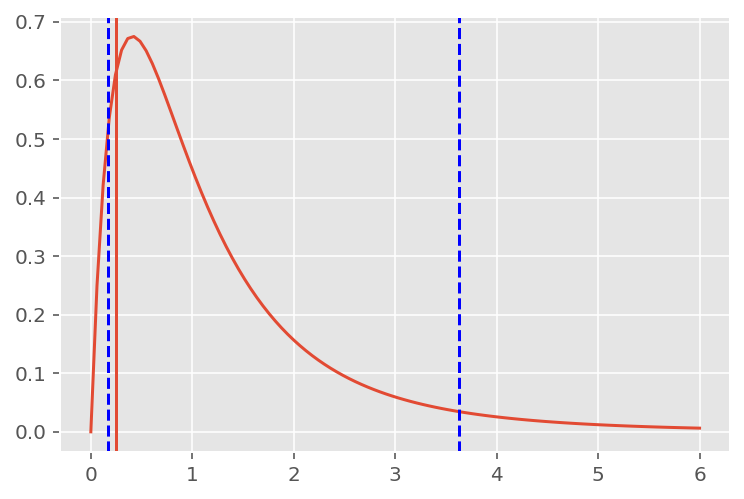

In [62]:
plt.plot(x_, y_)
plt.axvline(0.167, linestyle='--', color='blue')
plt.axvline(3.633, linestyle='--', color='blue')
plt.axvline(0.25)

In [64]:
1 - sts.f(4, 9).cdf(0.25)

0.902525112183866

Используя дельта-метод, на основе выборки из 100 наблюдений из распределения Пуассона с выборочным средним равным 2 найдите левую границу 95% симметричного по вероятности доверительного интервала для вероятности того, что не произойдет ни одного успеха.

----------
*  0.098
*  0.135  
*  0.173 
*  -0.023
*  0.011 
